#Snippets and Programs from Chapter 6: Drawing Geometric Shapes and Fractals

In [1]:
%matplotlib inline

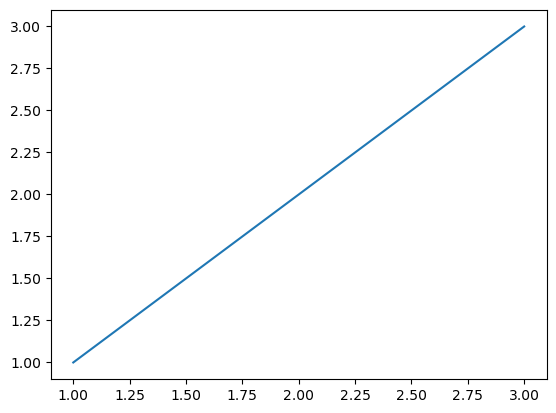

In [3]:
>>> import matplotlib.pyplot as plt
>>> x = [1, 2, 3]
>>> y = [1, 2, 3]
>>> plt.plot(x, y)
>>> plt.show()

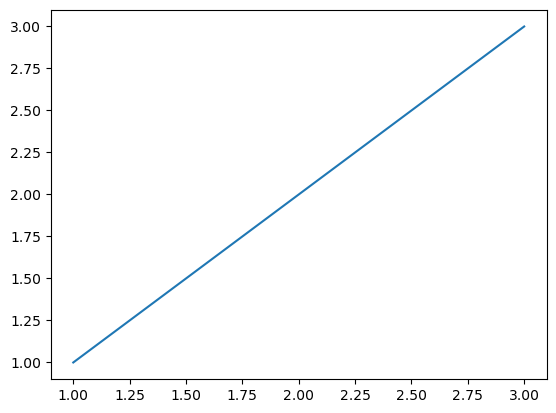

In [4]:
>>> import matplotlib.pyplot as plt
>>> x = [1, 2, 3]
>>> y = [1, 2, 3]
>>> fig = plt.figure()
>>> ax = plt.axes()
>>> plt.plot(x, y)
>>> plt.show()

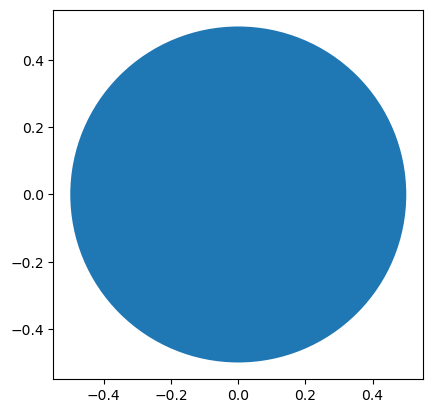

In [5]:
#P151: Drawing a Circle
'''
Example of using matplotlib's Circle patch
'''
import matplotlib.pyplot as plt

def create_circle():
    circle = plt.Circle((0, 0), radius = 0.5)
    return circle
def show_shape(patch):
    ax = plt.gca()
    ax.add_patch(patch)
    plt.axis('scaled')
    plt.show()

if __name__ == '__main__':
    c = create_circle()
    show_shape(c)

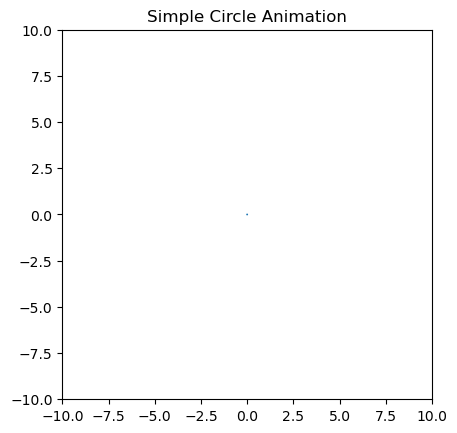

In [7]:
#P153: A growing circle
'''
The animation is not viiewable in notebook. See:
http://jakevdp.github.io/blog/2013/05/12/embedding-matplotlib-animations/


A growing circle
'''

from matplotlib import pyplot as plt
from matplotlib import animation

anim = None

def create_circle():
    circle = plt.Circle((0, 0), 0.05)
    return circle

def update_radius(i, circle):
    circle.radius = i*0.5
    return circle,

def create_animation():
    fig = plt.gcf()
    ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
    ax.set_aspect('equal')
    circle = create_circle()
    ax.add_patch(circle)
    global anim
    anim = animation.FuncAnimation(fig, update_radius, fargs = (circle,), frames=30, interval=50)
    plt.title('Simple Circle Animation')
    plt.show()

if __name__ == '__main__':
    create_animation()

Enter the initial velocity (m/s):  3
Enter the angle of projection (degrees):  40


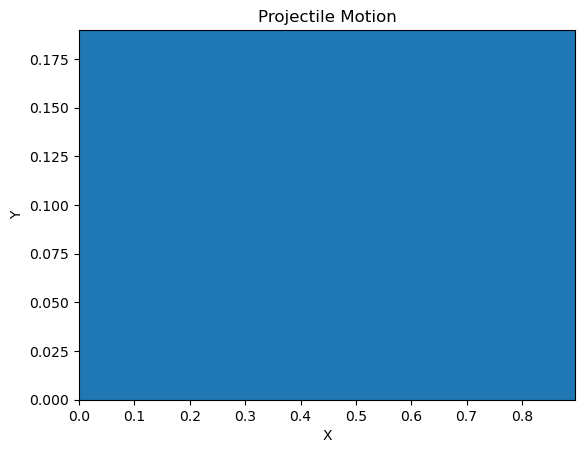

In [8]:
### P156: Animating a projectile's projectory
'''
Animate the trajectory of an object in projectile motion
'''
from matplotlib import pyplot as plt
from matplotlib import animation
import math
g = 9.8

def get_intervals(u, theta):
    t_flight = 2*u*math.sin(theta)/g
    intervals = []
    start = 0
    interval = 0.005
    while start < t_flight:
        intervals.append(start)
        start = start + interval
    return intervals

def update_position(i, circle, intervals, u, theta):
    t = intervals[i]
    x = u*math.cos(theta)*t
    y = u*math.sin(theta)*t - 0.5*g*t*t
    circle.center = x, y
    return circle,

def create_animation(u, theta):
    intervals = get_intervals(u, theta)
    xmin = 0
    xmax = u*math.cos(theta)*intervals[-1]
    ymin = 0
    t_max = u*math.sin(theta)/g
    ymax = u*math.sin(theta)*t_max - 0.5*g*t_max**2
    fig = plt.gcf()
    ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))
    circle = plt.Circle((xmin, ymin), 1.0)
    ax.add_patch(circle)
    anim = animation.FuncAnimation(fig, update_position,
                        fargs=(circle, intervals, u, theta),
                        frames=len(intervals), interval=1,
                        repeat=False)
    plt.title('Projectile Motion')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

if __name__ == '__main__':
    try:
        u = float(input('Enter the initial velocity (m/s): '))
        theta = float(input('Enter the angle of projection (degrees): '))
    except ValueError:
        print('You entered an invalid input')
    else:
        theta = math.radians(theta)
        create_animation(u, theta)

Enter the number of iterations:  40


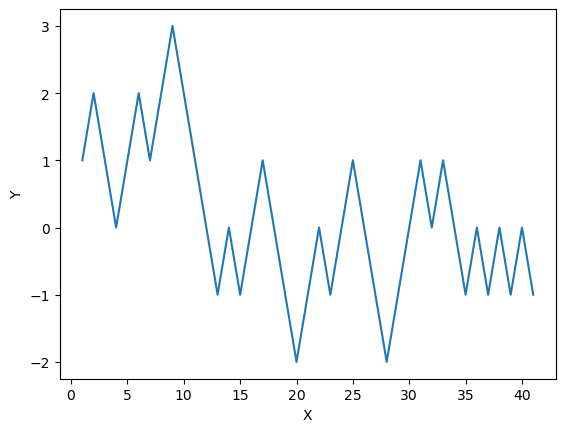

In [10]:
#P160: Random walk of a point in a plane
'''
Example of selecting a transformation from two equally probable
transformations
'''

import matplotlib.pyplot as plt
import random
def transformation_1(p):
    x = p[0]
    y = p[1]
    return x + 1, y - 1

def transformation_2(p):
    x = p[0]
    y = p[1]
    return x + 1, y + 1

def transform(p):
    # list of transformation functions
    transformations = [transformation_1, transformation_2]
    # pick a random transformation function and call it
    t = random.choice(transformations)
    x, y = t(p)
    return x, y

def build_trajectory(p, n):
    x = [p[0]]
    y = [p[1]]
    for i in range(n):
        p = transform(p)
        x.append(p[0])
        y.append(p[1])
    return x, y

if __name__ == '__main__':
    # initial point
    p = (1, 1)
    n = int(input('Enter the number of iterations: '))
    x, y = build_trajectory(p, n)
    # plot
    plt.plot(x, y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

Enter the number of points in the Fern:  3000


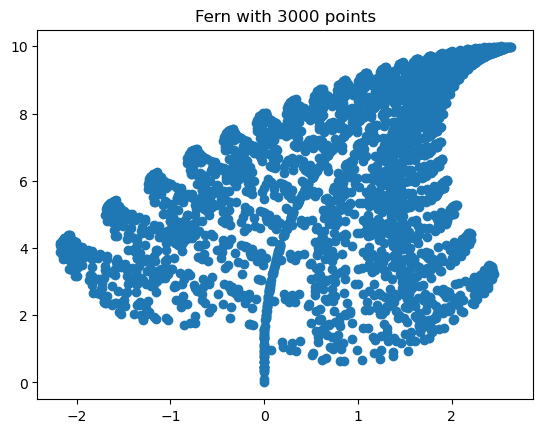

In [13]:
#P165: Draw Barnsley Fern
'''
Draw Barnsley Fern
'''
import random
import matplotlib.pyplot as plt

def transformation_1(p):
    x = p[0]
    y = p[1]
    x1 = 0.85*x + 0.04*y
    y1 = -0.04*x + 0.85*y + 1.6
    return x1, y1

def transformation_2(p):
    x = p[0]
    y = p[1]
    x1 = 0.2*x - 0.26*y
    y1 = 0.23*x + 0.22*y + 1.6
    return x1, y1

def transformation_3(p):
    x = p[0]
    y = p[1]
    x1 = -0.15*x + 0.28*y
    y1 = 0.26*x  + 0.24*y + 0.44
    return x1, y1

def transformation_4(p):
    x = p[0]
    y = p[1]
    x1 = 0
    y1 = 0.16*y
    return x1, y1

def get_index(probability):
    r = random.random()
    c_probability = 0
    sum_probability = []
    for p in probability:
        c_probability += p
        sum_probability.append(c_probability)
    for item, sp in enumerate(sum_probability):
        if r <= sp:
            return item
    return len(probability)-1

def transform(p):
    # list of transformation functions
    transformations = [transformation_1, transformation_2,
                           transformation_3, transformation_4]
    probability = [0.85, 0.07, 0.07, 0.01]
    # pick a random transformation function and call it
    tindex = get_index(probability)
    t = transformations[tindex]
    x, y = t(p)
    return x, y

def draw_fern(n):
    # We start with (0, 0)
    x = [0]
    y = [0]
    x1, y1 = 0, 0
    for i in range(n):
       x1, y1 = transform((x1, y1))
       x.append(x1)
       y.append(y1)
    return x, y

if __name__ == '__main__':
    n = int(input('Enter the number of points in the Fern: '))
    x, y = draw_fern(n)
    # Plot the points
    plt.plot(x, y, 'o')
    plt.title('Fern with {0} points'.format(n))
    plt.show()



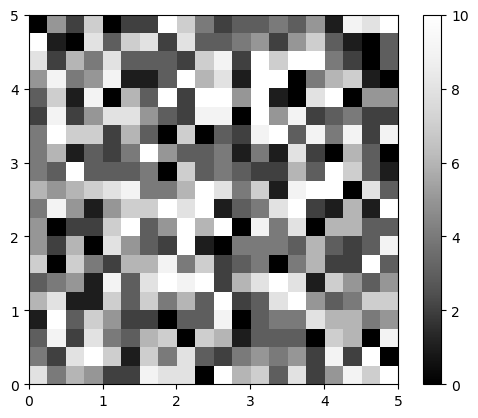

In [14]:
#P174: Example of using the imshow() function

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random

def initialize_image(x_p, y_p): 
    image = []
    for i in range(y_p):
        x_colors = []
        for j in range(x_p):
            x_colors.append(0)
        image.append(x_colors)
    return image

def color_points():
    x_p = 20
    y_p = 20
    image = initialize_image(x_p, y_p)
    for i in range(y_p):
        for j in range(x_p):
            image[i][j] = random.randint(0, 10)
    plt.imshow(image, origin='lower', extent=(0, 5, 0, 5),
               cmap=cm.Greys_r, interpolation='nearest')
    plt.colorbar()
    plt.show()
    
if __name__ == '__main__':
    color_points()